In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 의료급여 의료보호대상자 급여통계

In [45]:
import pandas as pd
basedf3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/메타포3조/메타포DA/데이터/국민건강보험공단_의료급여의료보호대상자급여통계_20230331.csv', encoding='cp949')
basedf3.to_csv('basedf.csv', encoding='utf-8')

print(basedf3.head(3))

<ipython-input-45-63bcdf0bfd86>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  basedf3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/메타포3조/메타포DA/데이터/국민건강보험공단_의료급여의료보호대상자급여통계_20230331.csv', encoding='cp949')


      통계년월   시도보호기호  시군구보호기호  통계지사코드  통계소속구분 통계보호종별코드  통계보호유형코드  통계정액행위구분  \
0  2023-01  5691000  5690000     557       0        1        11         0   
1  2023-01  5691000  5690000     557       0        1        11         0   
2  2023-01  5691000  5690000     557       0        1        11         0   

   통계요양기관종별코드  통계서식코드  ...  통계진료일수  통계초진횟수  통계재진횟수   통계총진료비  통계기관부담금  통계본인부담금  \
0           1       2  ...      18       0       0  1526180  1519580     6600   
1           1       2  ...      48       0       1  5890580  5883690     6890   
2           1       2  ...      54       0       2  4568620  4528140    40480   

   통계장애인기금건수  통계장애인기금  통계대불건수  통계대불금  
0          0        0       0      0  
1          0        0       0      0  
2          0        0       0      0  

[3 rows x 24 columns]


In [46]:
basedf3.tail()

,통계년월,시도보호기호,시군구보호기호,통계지사코드,통계소속구분,통계보호종별코드,통계보호유형코드,통계정액행위구분,통계요양기관종별코드,통계서식코드,...,통계진료일수,통계초진횟수,통계재진횟수,통계총진료비,통계기관부담금,통계본인부담금,통계장애인기금건수,통계장애인기금,통계대불건수,통계대불금
657982,2023-03,6500000,6520000,802,0,2,21,9,7,8,...,3,0,1,8380,8380,0,0,0,0,0
657983,2023-03,6500000,6520000,802,0,2,49,0,3,3,...,4,2,2,131130,127130,4000,0,0,0,0
657984,2023-03,6500000,6520000,802,0,2,49,0,3,3,...,1,1,0,19430,18430,1000,0,0,0,0
657985,2023-03,6500000,6520000,802,0,2,49,0,8,21,...,28,0,0,33740,32740,1000,0,0,0,0
657986,2023-03,6500000,6520000,802,0,2,49,0,8,21,...,5,0,0,13110,12610,500,0,0,0,0


In [47]:
basedf3.columns

Index(['통계년월', '시도보호기호', '시군구보호기호', '통계지사코드', '통계소속구분', '통계보호종별코드', '통계보호유형코드',
       '통계정액행위구분', '통계요양기관종별코드', '통계서식코드', '통계성별구분', '통계연령유형코드', '통계진료건수',
       '통계입내원일수', '통계진료일수', '통계초진횟수', '통계재진횟수', '통계총진료비', '통계기관부담금', '통계본인부담금',
       '통계장애인기금건수', '통계장애인기금', '통계대불건수', '통계대불금'],
      dtype='object')

In [48]:
columns_to_drop = ['통계지사코드', '통계소속구분', '통계보호종별코드', '통계보호유형코드',
       '통계정액행위구분', '통계요양기관종별코드', '통계서식코드',
       '통계장애인기금건수', '통계장애인기금', '통계대불건수', '통계대불금']
basedf3 = basedf3.drop(columns=columns_to_drop, errors='ignore')

basedf3.head()

,통계년월,시도보호기호,시군구보호기호,통계성별구분,통계연령유형코드,통계진료건수,통계입내원일수,통계진료일수,통계초진횟수,통계재진횟수,통계총진료비,통계기관부담금,통계본인부담금
0,2023-01,5691000,5690000,1,5,1,4,18,0,0,1526180,1519580,6600
1,2023-01,5691000,5690000,1,11,1,8,48,0,1,5890580,5883690,6890
2,2023-01,5691000,5690000,1,12,4,20,54,0,2,4568620,4528140,40480
3,2023-01,5691000,5690000,1,13,12,103,250,2,3,47568730,47363750,204980
4,2023-01,5691000,5690000,1,14,5,28,83,2,0,11890330,11839840,50490


In [49]:
gender_mapping = {
    1: '남자',
    2: '여자'
}

age_mapping = {
    1: '0~4세',
    2: '5~9세',
    3: '10~14세',
    4: '15~19세',
    5: '20~24세',
    6: '25~29세',
    7: '30~34세',
    8: '35~39세',
    9: '40~44세',
    10: '45~49세',
    11: '50~54세',
    12: '55~59세',
    13: '60~64세',
    14: '65~69세',
    15: '70~74세',
    16: '75~79세',
    17: '80~84세',
    18: '85세+'
}

city_mapping = {
    '1100000': '서울특별시',
    '2600000': '부산광역시',
    '2700000': '대구광역시',
    '2800000': '인천광역시',
    '2900000': '광주광역시',
    '3000000': '대전광역시',
    '3100000': '울산광역시',
    '3600000': '세종특별자치시',
    '4100000': '경기도',
    '4200000': '강원도',
    '4300000': '충청북도',
    '4400000': '충청남도',
    '4500000': '전라북도',
    '4600000': '전라남도',
    '4700000': '경상북도',
    '4800000': '경상남도',
    '4900000': '제주특별자치도'
}

### 필요한 정보만

In [50]:
# 매핑 적용
basedf3['성별'] = basedf3['통계성별구분'].map(gender_mapping)
basedf3['연령대'] = basedf3['통계연령유형코드'].map(age_mapping)

basedf3 = basedf3.drop(['통계성별구분', '통계연령유형코드', '시도보호기호', '시군구보호기호'], axis=1)

# 결과 확인
basedf3.head()

,통계년월,통계진료건수,통계입내원일수,통계진료일수,통계초진횟수,통계재진횟수,통계총진료비,통계기관부담금,통계본인부담금,성별,연령대
0,2023-01,1,4,18,0,0,1526180,1519580,6600,남자,20~24세
1,2023-01,1,8,48,0,1,5890580,5883690,6890,남자,50~54세
2,2023-01,4,20,54,0,2,4568620,4528140,40480,남자,55~59세
3,2023-01,12,103,250,2,3,47568730,47363750,204980,남자,60~64세
4,2023-01,5,28,83,2,0,11890330,11839840,50490,남자,65~69세


#### 연령대별 통계 총 진료비 시각화

<ipython-input-59-b8045f61326b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_df['연령대'] = pd.Categorical(adult_df['연령대'], categories=age_order, ordered=True)
<ipython-input-59-b8045f61326b>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = adult_df.groupby('연령대').agg({
<ipython-input-59-b8045f61326b>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=adult_df, x='연령대', y='통계총진료비',


=== 연령대별 기본 통계량 ===
       통계총진료비                                           통계진료건수  통계입내원일수
        count        mean          std min        max      sum      sum
연령대                                                                    
50~54세  37612  3131933.67   7080655.46   0  269393040   915680  1363176
55~59세  44214  4801474.98  11140170.04   0  301815770  1610976  2474589
60~64세  48163  6085351.94  14913083.40   0  309421730  2132287  3345794
65~69세  52819  7259246.12  19280439.23   0  393182880  2830014  4320453
70~74세  50264  7678868.58  20728712.27   0  402340480  2927564  4176714
75~79세  44596  6569507.14  17300571.45   0  347263000  2357427  3146004
80~84세  41762  6149508.10  16031943.34   0  439403970  2053677  2706938
85세+    39892  6337344.52  17911399.23   0  300702970  1833665  2615314

=== 성별별 기본 통계량 ===
    통계총진료비                                           통계진료건수   통계입내원일수
     count        mean          std min        max      sum       sum
성별                          

<ipython-input-59-b8045f61326b>:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
<ipython-input-59-b8045f61326b>:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=adult_df, x='성별', y='통계총진료비',
<ipython-input-59-b8045f61326b>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=adult_df, x='성별', y='통계총진료비',
<ipython-input-59-b8045f61326b>:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
<ipython-input-59-b8045f61326b>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for

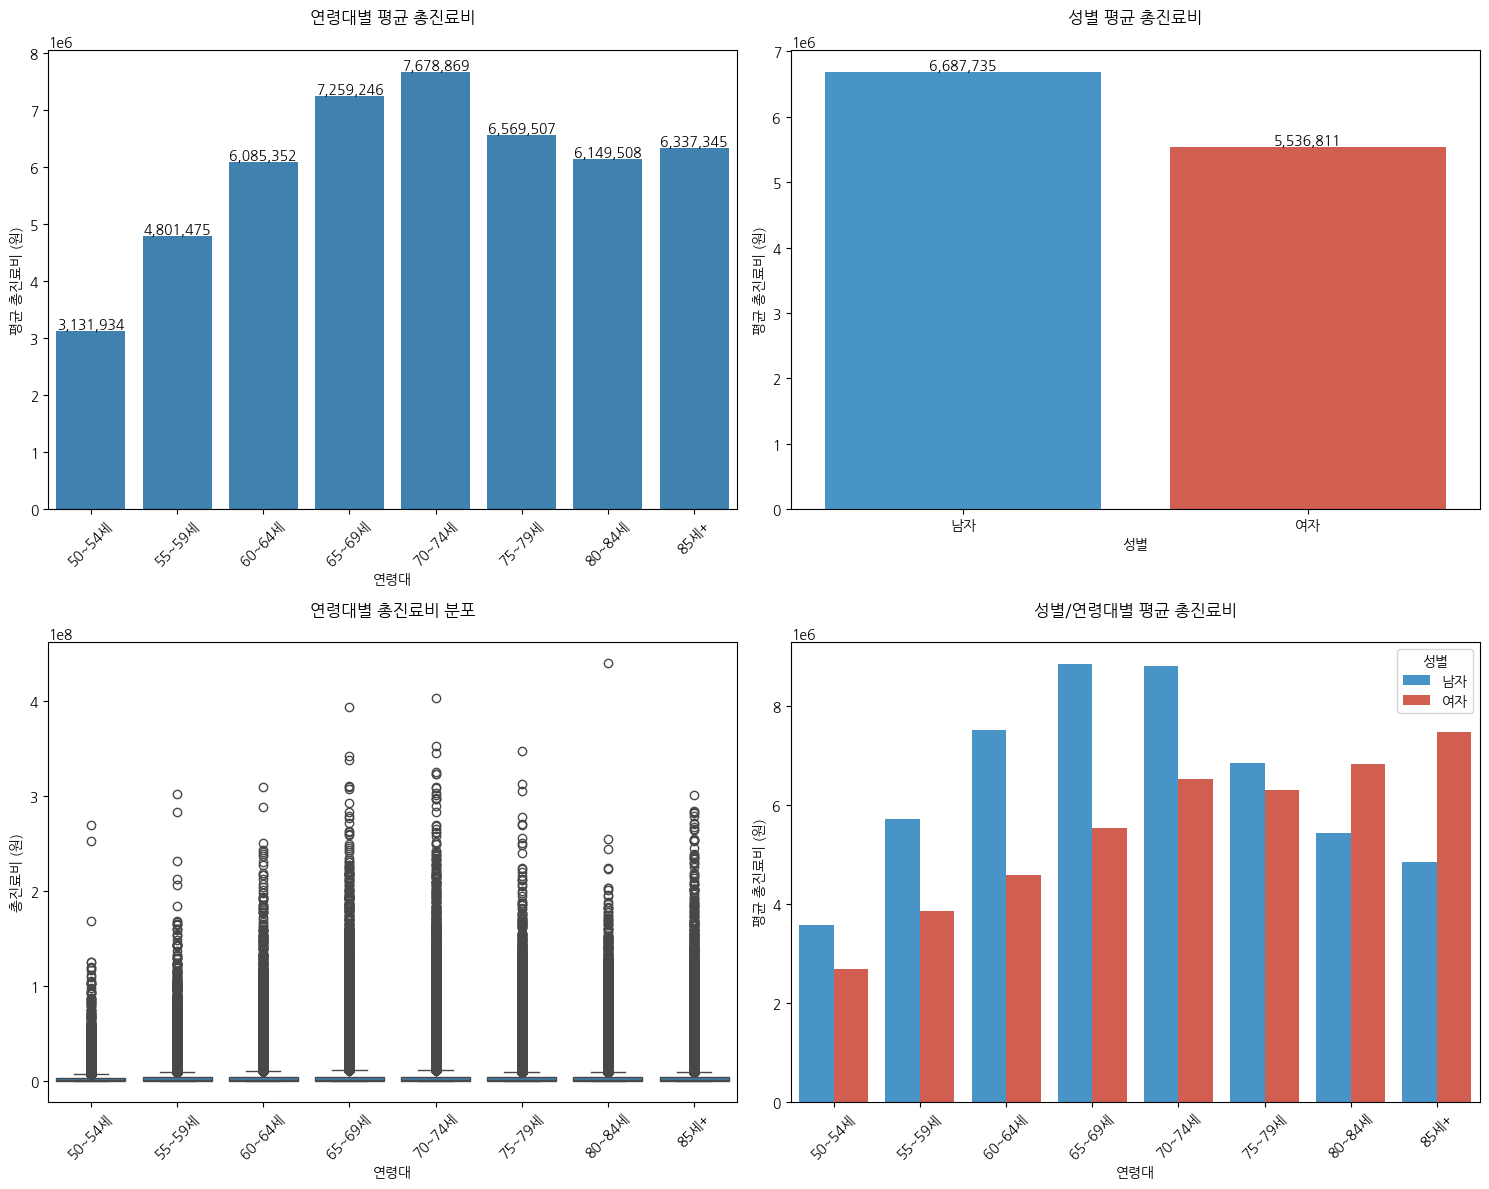


=== 연령대별 진료건수 비율(%) ===
연령대
50~54세     5.50
55~59세     9.67
60~64세    12.80
65~69세    16.99
70~74세    17.57
75~79세    14.15
80~84세    12.33
85세+      11.01
Name: 통계진료건수, dtype: float64

=== 성별/연령대별 평균 본인부담금 비율(%) ===
성별  연령대   
남자  50~54세    2.18
    55~59세    2.26
    60~64세    2.18
    65~69세    2.06
    70~74세    1.97
    75~79세    1.67
    80~84세    1.54
    85세+      1.53
여자  50~54세    2.45
    55~59세    2.44
    60~64세    2.25
    65~69세    2.10
    70~74세    2.01
    75~79세    1.80
    80~84세    1.74
    85세+      1.83
dtype: float64


<ipython-input-59-b8045f61326b>:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_visit_ratio = adult_df.groupby('연령대')['통계진료건수'].sum() / adult_df['통계진료건수'].sum() * 100
<ipython-input-59-b8045f61326b>:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_ratio = adult_df.groupby(['성별', '연령대'])['통계본인부담금'].mean() / \
<ipython-input-59-b8045f61326b>:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adult_df.group

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 연령대 순서 정의
age_order = ['50~54세', '55~59세', '60~64세', '65~69세', '70~74세', '75~79세',
             '80~84세', '85세+']

adult_df = basedf3[basedf3['연령대'].isin(age_order)]

# 연령대를 카테고리형으로 변환하고 순서 지정
adult_df['연령대'] = pd.Categorical(adult_df['연령대'], categories=age_order, ordered=True)

# 1. 연령대별 기본 통계량
age_stats = adult_df.groupby('연령대').agg({
    '통계총진료비': ['count', 'mean', 'std', 'min', 'max'],
    '통계진료건수': 'sum',
    '통계입내원일수': 'sum'
}).round(2)

print("=== 연령대별 기본 통계량 ===")
print(age_stats)

# 2. 성별별 기본 통계량
gender_stats = adult_df.groupby('성별').agg({
    '통계총진료비': ['count', 'mean', 'std', 'min', 'max'],
    '통계진료건수': 'sum',
    '통계입내원일수': 'sum'
}).round(2)

print("\n=== 성별별 기본 통계량 ===")
print(gender_stats)

# 3. 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 3.1 연령대별 평균 총진료비
sns.barplot(data=adult_df, x='연령대', y='통계총진료비',
            ax=ax1, ci=None, color='#2E86C1', order=age_order)
ax1.set_title('연령대별 평균 총진료비', pad=20, fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylabel('평균 총진료비 (원)')

# 평균값 표시
for i, p in enumerate(ax1.patches):
    ax1.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')

# 3.2 성별 평균 총진료비
sns.barplot(data=adult_df, x='성별', y='통계총진료비',
            ax=ax2, ci=None, palette=['#3498DB', '#E74C3C'])
ax2.set_title('성별 평균 총진료비', pad=20, fontsize=12)
ax2.set_ylabel('평균 총진료비 (원)')

# 평균값 표시
for i, p in enumerate(ax2.patches):
    ax2.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')

# 3.3 연령대별 상자그림
sns.boxplot(data=adult_df, x='연령대', y='통계총진료비',
            ax=ax3, color='#2E86C1', order=age_order)
ax3.set_title('연령대별 총진료비 분포', pad=20, fontsize=12)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_ylabel('총진료비 (원)')

# 3.4 성별&연령대별 평균 총진료비
sns.barplot(data=adult_df, x='연령대', y='통계총진료비',
            hue='성별', ax=ax4, ci=None, palette=['#3498DB', '#E74C3C'], order=age_order)
ax4.set_title('성별/연령대별 평균 총진료비', pad=20, fontsize=12)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
ax4.set_ylabel('평균 총진료비 (원)')

plt.tight_layout()
plt.show()

# 4. 추가 분석: 연령대별 진료건수 비율
age_visit_ratio = adult_df.groupby('연령대')['통계진료건수'].sum() / adult_df['통계진료건수'].sum() * 100

print("\n=== 연령대별 진료건수 비율(%) ===")
print(age_visit_ratio.round(2))

# 5. 성별/연령대별 평균 본인부담금 비율
gender_age_ratio = adult_df.groupby(['성별', '연령대'])['통계본인부담금'].mean() / \
                  adult_df.groupby(['성별', '연령대'])['통계총진료비'].mean() * 100

print("\n=== 성별/연령대별 평균 본인부담금 비율(%) ===")
print(gender_age_ratio.round(2))

## 건강보험 요양급여
실적_직역별_진료 형태별

In [3]:
basedf4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/메타포3조/메타포DA/데이터/보건복지부_건강보험 요양급여 실적_직역별_진료 형태별_20221231.csv', encoding='cp949')
basedf4.to_csv('basedf.csv', encoding='utf-8')

print(basedf4.head(3))

     연도        급여종류      입내원일수  내원1일당진료비(원)  내원1일당급여비(원)    진료비(천원)_계  \
0  2015  직장_의료기관_입원   88172964       161284       131925  14220923885   
1  2015  직장_의료기관_외래  619498627        28186        19649  17461176712   
2  2015    직장_약국_처방  352201906        26431        19036   9308932875   

   진료비(천원)_급여비  
0  11632252088  
1  12172754337  
2   6704361534  


In [4]:
print(basedf4['급여종류'].unique())

['직장_의료기관_입원' '직장_의료기관_외래' '직장_약국_처방' '직장_약국_직접' '지역_의료기관_입원' '지역_의료기관_외래'
 '지역_약국_처방' '지역_약국_직접']


### 지역 의료기관 외래 진료의 진료비

In [5]:
basedf4_filtered = basedf4[basedf4['급여종류'] == '지역_의료기관_외래']
basedf4_filtered

,연도,급여종류,입내원일수,내원1일당진료비(원),내원1일당급여비(원),진료비(천원)_계,진료비(천원)_급여비
5,2015,지역_의료기관_외래,235977169,29646,21048,6995844089,4966920609
13,2016,지역_의료기관_외래,238295663,31668,22411,7546284993,5340452145
21,2017,지역_의료기관_외래,236602734,34498,24461,8162406912,5787526386
29,2018,지역_의료기관_외래,50013653,189368,154971,9470993585,7750645982
37,2019,지역_의료기관_외래,246487104,41138,29696,10139864224,7319621020
45,2020,지역_의료기관_외래,218854603,46697,33792,10219921008,7395578861
53,2021,지역_의료기관_외래,229234591,51029,36671,11697604047,8406346864
61,2022,지역_의료기관_외래,255671941,53416,38551,13656928552,9856339446


In [6]:
!sudo apt-get install -y fonts-nanum # 폰트 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

#### 시각화1

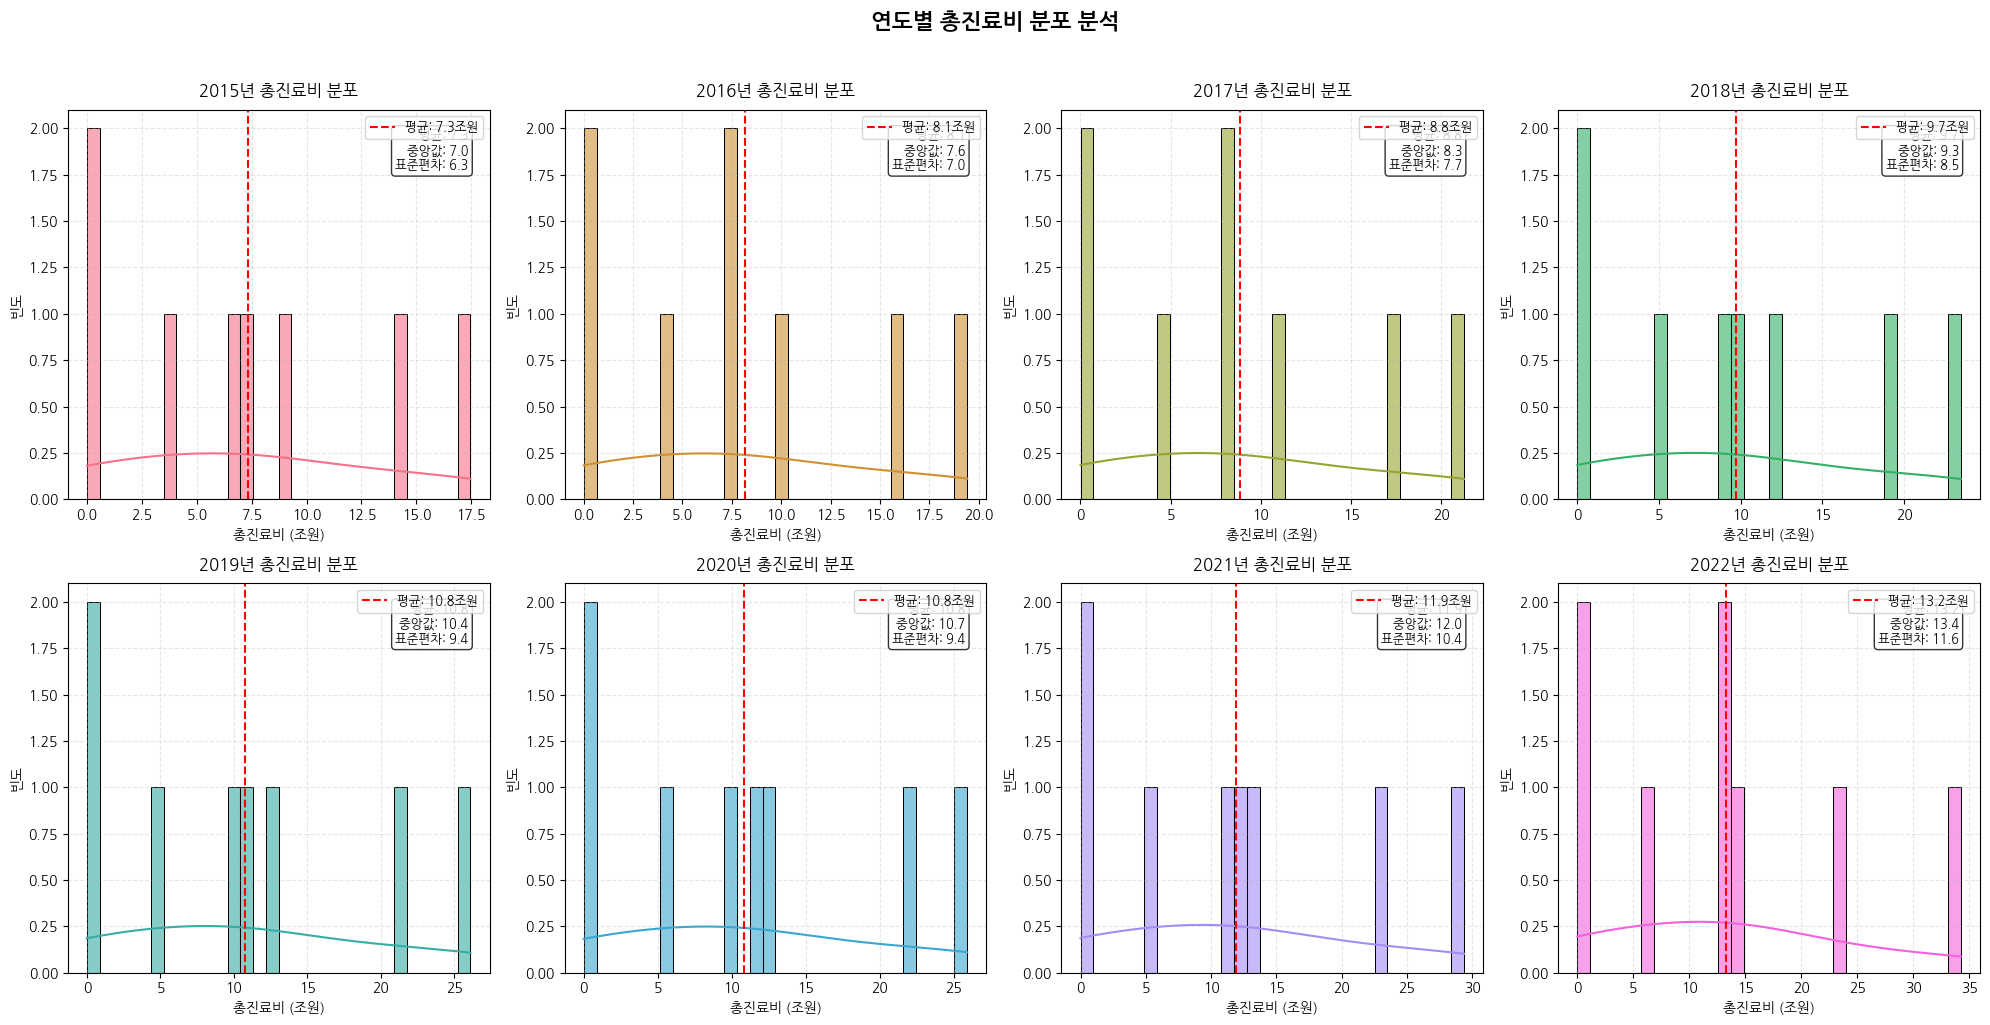


=== 연도별 총진료비 기본 통계량 ===
      count   mean    std  min    max
연도                                   
2015      8   7.35   6.25  0.0  17.46
2016      8   8.15   7.01  0.0  19.42
2017      8   8.84   7.66  0.0  21.26
2018      8   9.74   8.46  0.0  23.47
2019      8  10.76   9.37  0.0  26.09
2020      8  10.84   9.35  0.0  25.91
2021      8  11.93  10.36  0.0  29.37
2022      8  13.23  11.61  0.0  34.24


In [21]:
# 서브플롯 생성
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

# 컬러 팔레트 설정
colors = sns.color_palette("husl", 8)

# 연도별로 히스토그램과 KDE 그리기
for idx, year in enumerate(sorted(basedf4['연도'].unique())):
    year_data = basedf4[basedf4['연도'] == year]['총진료비']

    # 히스토그램과 KDE 그리기
    sns.histplot(data=year_data,
                ax=axes[idx],
                kde=True,
                color=colors[idx],
                alpha=0.6,
                bins=30)

    # 평균값 표시
    mean_value = year_data.mean()
    axes[idx].axvline(mean_value, color='red', linestyle='--',
                     label=f'평균: {mean_value:.1f}조원')

    # 그래프 꾸미기
    axes[idx].set_title(f'{year}년 총진료비 분포', fontsize=12, pad=10)
    axes[idx].set_xlabel('총진료비 (조원)', fontsize=10)
    axes[idx].set_ylabel('빈도', fontsize=10)
    axes[idx].legend(fontsize=9)

    # 격자 추가
    axes[idx].grid(True, linestyle='--', alpha=0.3)

    # 기본 통계 추가
    stats = f'평균: {year_data.mean():.1f}\n중앙값: {year_data.median():.1f}\n표준편차: {year_data.std():.1f}'
    axes[idx].text(0.95, 0.95, stats,
                  transform=axes[idx].transAxes,
                  verticalalignment='top',
                  horizontalalignment='right',
                  bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                  fontsize=9)

# 전체 타이틀 설정
plt.suptitle('연도별 총진료비 분포 분석', fontsize=16, fontweight='bold', y=1.02)

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 전체 통계 출력
print("\n=== 연도별 총진료비 기본 통계량 ===")
yearly_stats = basedf4.groupby('연도')['총진료비'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
print(yearly_stats)

#### 시각화2

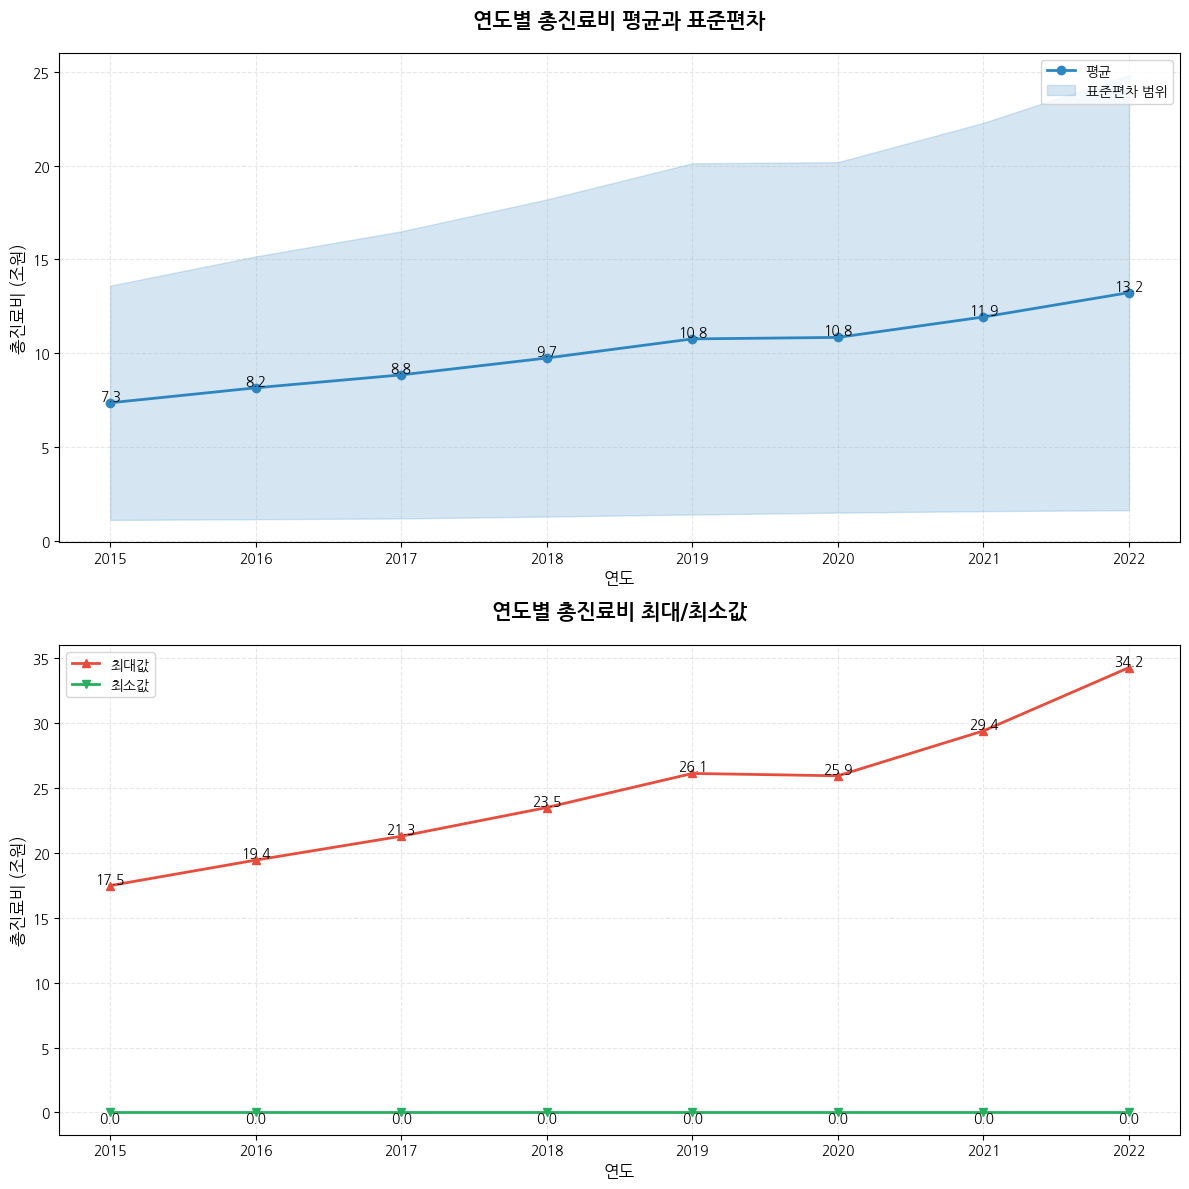


=== 연도별 총진료비 기본 통계량 ===
       mean    std  min    max
연도                            
2015   7.35   6.25  0.0  17.46
2016   8.15   7.01  0.0  19.42
2017   8.84   7.66  0.0  21.26
2018   9.74   8.46  0.0  23.47
2019  10.76   9.37  0.0  26.09
2020  10.84   9.35  0.0  25.91
2021  11.93  10.36  0.0  29.37
2022  13.23  11.61  0.0  34.24

=== 연간 평균 총진료비 증가율(%) ===
연도
2015      NaN
2016    10.88
2017     8.47
2018    10.18
2019    10.47
2020     0.74
2021    10.06
2022    10.90
Name: mean, dtype: float64


In [22]:
# 연도별 통계량 계산
yearly_stats = basedf4.groupby('연도')['총진료비'].agg(['mean', 'std', 'min', 'max']).round(2)

# 그래프 크기 설정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# 1. 평균과 표준편차 시각화
ax1.plot(yearly_stats.index, yearly_stats['mean'], 'o-', color='#2E86C1', linewidth=2, label='평균')
ax1.fill_between(yearly_stats.index,
                 yearly_stats['mean'] - yearly_stats['std'],
                 yearly_stats['mean'] + yearly_stats['std'],
                 alpha=0.2, color='#2E86C1', label='표준편차 범위')

# 평균값 레이블 표시
for year, mean in zip(yearly_stats.index, yearly_stats['mean']):
    ax1.text(year, mean, f'{mean:.1f}', ha='center', va='bottom')

ax1.set_title('연도별 총진료비 평균과 표준편차', pad=20, fontsize=15, fontweight='bold')
ax1.set_xlabel('연도', fontsize=12)
ax1.set_ylabel('총진료비 (조원)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.legend()

# 2. 최대, 최소값 시각화
ax2.plot(yearly_stats.index, yearly_stats['max'], '^-', color='#E74C3C', label='최대값', linewidth=2)
ax2.plot(yearly_stats.index, yearly_stats['min'], 'v-', color='#27AE60', label='최소값', linewidth=2)

# 최대/최소값 레이블 표시
for year, max_val, min_val in zip(yearly_stats.index, yearly_stats['max'], yearly_stats['min']):
    ax2.text(year, max_val, f'{max_val:.1f}', ha='center', va='bottom')
    ax2.text(year, min_val, f'{min_val:.1f}', ha='center', va='top')

ax2.set_title('연도별 총진료비 최대/최소값', pad=20, fontsize=15, fontweight='bold')
ax2.set_xlabel('연도', fontsize=12)
ax2.set_ylabel('총진료비 (조원)', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# 통계량 테이블 출력
print("\n=== 연도별 총진료비 기본 통계량 ===")
print(yearly_stats)

# 연간 증가율 계산
yearly_growth = yearly_stats['mean'].pct_change() * 100
print("\n=== 연간 평균 총진료비 증가율(%) ===")
print(yearly_growth.round(2))

#### 시각화3

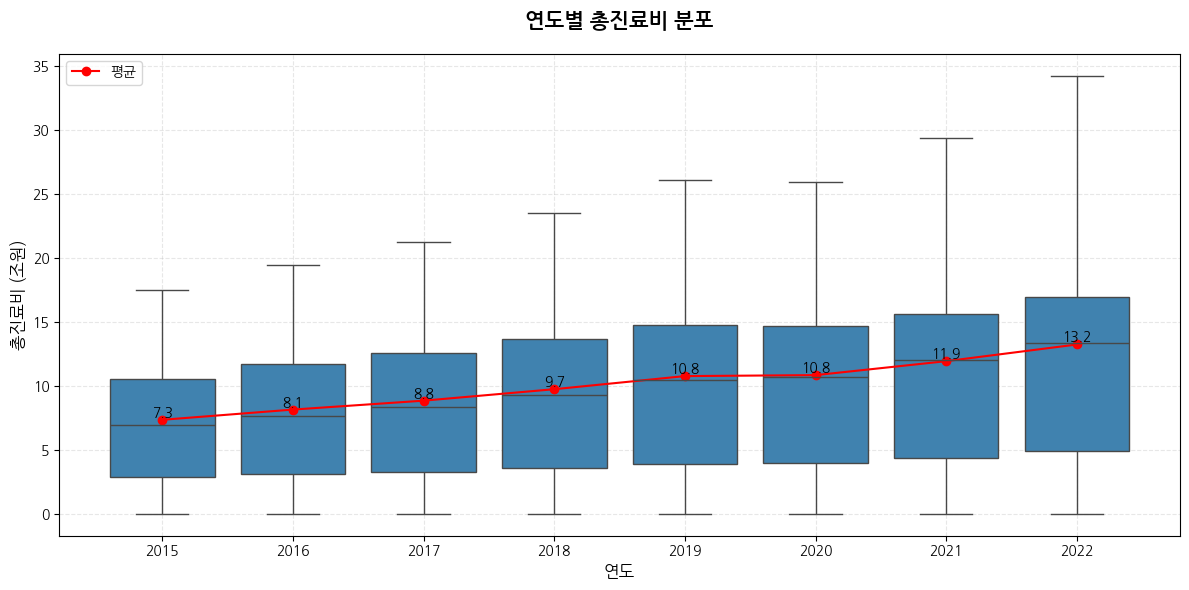

In [24]:
# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 박스플롯 그리기
sns.boxplot(data=basedf4, x='연도', y='총진료비', color='#2E86C1')

# 그래프 꾸미기
plt.title('연도별 총진료비 분포', pad=20, fontsize=15, fontweight='bold')
plt.xlabel('연도', fontsize=12)
plt.ylabel('총진료비 (조원)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# 평균값 표시
means = basedf4.groupby('연도')['총진료비'].mean()
plt.plot(range(len(means)), means.values, 'ro-', label='평균')
for i, mean in enumerate(means):
    plt.text(i, mean, f'{mean:.1f}', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()